<a href="https://colab.research.google.com/github/Aiswaryabinu/logistic_regression/blob/main/task5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Linear Risk Model
-for retinopathy in diabetes patients using logistic regression.
Steps:
 - Data preprocessing
  - Log transformations
   - Standardization
 - Basic Risk Models
   - Logistic Regression
  - C-index
   - Interactions Terms


Retinopathy is an eye condition that causes changes to the blood vessels in the part of the eye called the retina.

 This often leads to vision changes or blindness.

Diabetic patients are known to be at high risk for retinopathy.
    

Logistic Regression (Supervised Learning)   
Logistic regression is an appropriate analysis to use for predicting the probability of a binary outcome. In our case, this would be the probability of having or not having diabetic retinopathy.

Logistic Regression is one of the most commonly used algorithms for binary classification. It is used to find the best fitting model to describe the relationship between a set of features (also referred to as input, independent, predictor, or explanatory variables) and a binary outcome label (also referred to as an output, dependent, or response variable). Logistic regression has the property that the output prediction is always in the range $[0,1]$. Sometimes this output is used to represent a probability from 0%-100%, but for straight binary classification, the output is converted to either $0$ or $1$ depending on whether it is below or above a certain threshold, usually $0.5$.

 Packages


 `numpy` is the fundamental package for scientific computing in python.

 `pandas` is what we'll use to manipulate our data.

 `matplotlib` is a plotting library.

In [ ]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv("synthetic_retinopathy_5000.csv")
df.head()

,Age,Systolic_BP,Diastolic_BP,Cholesterol,Retinopathy
0,55,123.643605,73.215053,195.697304,0
1,48,123.198788,76.945005,199.020323,0
2,57,103.065352,74.026189,201.928846,0
3,68,125.048647,81.104180,228.405844,1
4,47,140.992436,91.971785,177.583481,0


In [ ]:
x=df.drop('Retinopathy',axis=1)
y=df['Retinopathy']


train_size=0.75 specifies that 75% of the data will be used for the training set, and the remaining 25% for the testing set.

random_state=0 ensures that the splitting is reproducible.

In [ ]:
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.75, random_state=0)

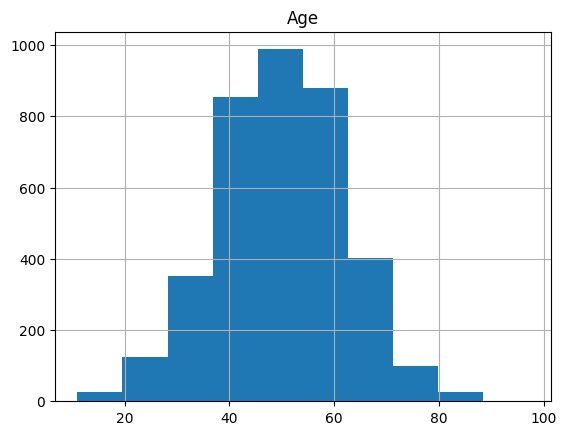

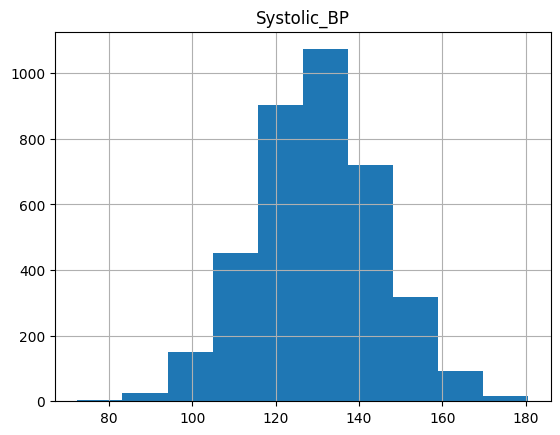

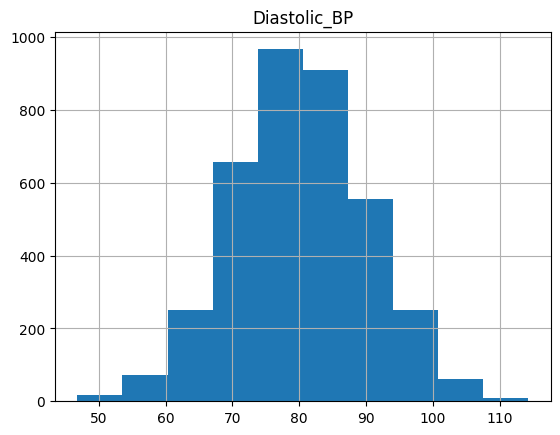

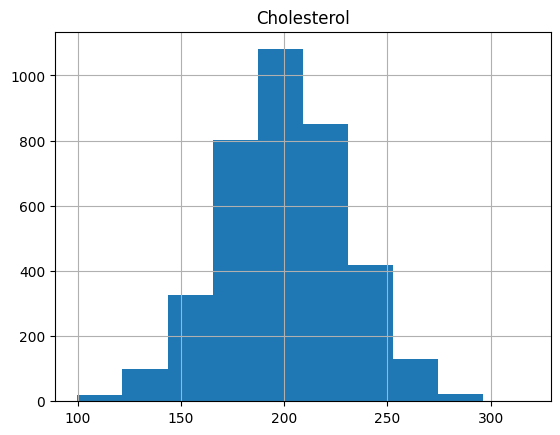

In [ ]:
# Plot the histograms of each column of `X_train` below:
for col in x.columns:
    x_train.loc[:, col].hist()
    plt.title(col)
    plt.show()

✅ A bell-shaped distribution refers to a normal (Gaussian) distribution where:

    Most values are near the mean.

    The shape is symmetric (no skew).

📈 A rightward skew (positive skew) means:

    The tail on the right side of the distribution is longer.

    There are a few extremely high values pulling the mean to the right.

    The distribution becomes asymmetric.

⚠️ Many statistical models (like linear regression) assume normal distribution of data.

    Skewed data can affect model performance.

🔄 To correct skewness, data is often transformed (e.g., log transformation) to make it more normal-like.

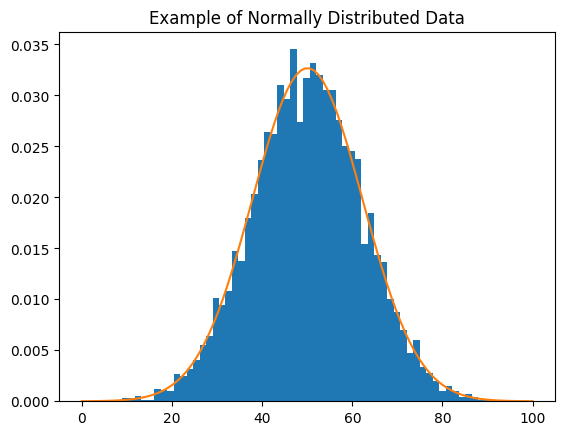

In [ ]:
from scipy.stats import norm
data = np.random.normal(50,12, 5000)
fitting_params = norm.fit(data)
norm_dist_fitted = norm(*fitting_params)
t = np.linspace(0,100, 100)
plt.hist(data, bins=60, density=True)
plt.plot(t, norm_dist_fitted.pdf(t))
plt.title('Example of Normally Distributed Data')
plt.show()


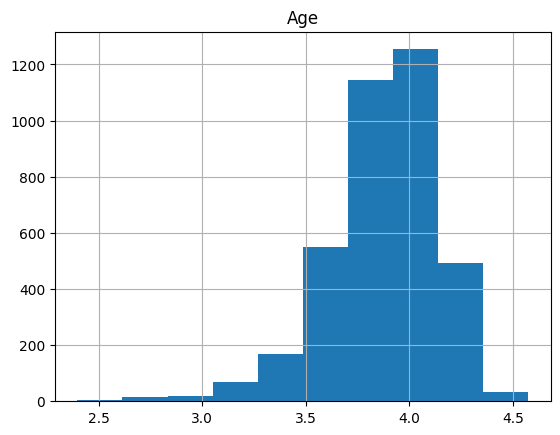

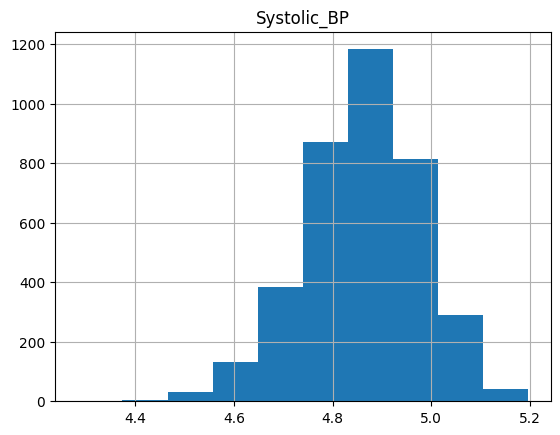

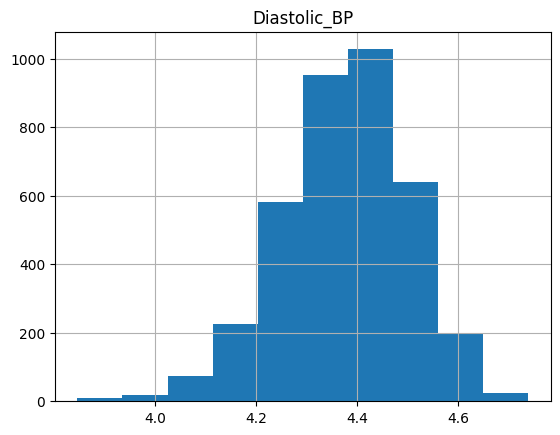

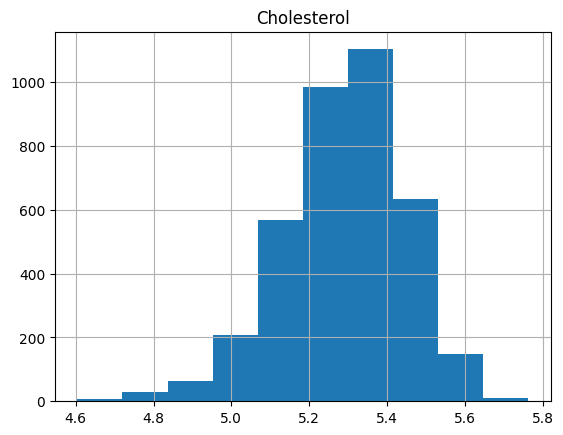

In [ ]:
for col in x_train.columns:
    np.log(x_train.loc[:, col]).hist()
    plt.title(col)
    plt.show()

Removing Skewness with Log Transformation

Skewed data can negatively impact statistical models that assume normality.

 One common solution is to apply a log transformation to the skewed feature(s):

    This compresses large values more than small ones.

    It helps reduce right skewness.

📊 When we take the log of each feature, the distribution often becomes:

    More symmetric.

    Closer to a normal (bell-shaped) distribution.

✅ This transformation makes the data more suitable for models like:

    Linear regression

    Logistic regression

    Many machine learning algorithms

In [ ]:
def make_standard_normal(df_train, df_test):
    """
    Transform data to reduce skew and standardize with mean 0 and std 1.

    Args:
      df_train (DataFrame): unnormalized training data.
      df_test (DataFrame): unnormalized test data.

    Returns:
      df_train_standardized (DataFrame): normalized training data.
      df_test_standardized (DataFrame): normalized test data.
    """
    # Apply log(1 + x) to handle zero or small values
    df_train_unskewed = np.log1p(df_train)
    df_test_unskewed = np.log1p(df_test)

    # Calculate mean and std from training data (after log transform)
    mean = df_train_unskewed.mean()
    stdev = df_train_unskewed.std()

    # Standardize training set
    df_train_standardized = (df_train_unskewed - mean) / stdev

    # Standardize test set using training mean and std
    df_test_standardized = (df_test_unskewed - mean) / stdev


    return df_train_standardized, df_test_standardized


In [ ]:
def make_standard_normal_test(fn):
    import pandas as pd
    import numpy as np
    from scipy.stats import skew

    # Create dummy skewed data
    np.random.seed(1)
    df_train = pd.DataFrame({
        "field1": np.random.exponential(scale=2.0, size=1000),
        "field2": np.random.exponential(scale=3.0, size=1000)
    })

    df_test = pd.DataFrame({
        "field1": np.random.exponential(scale=2.0, size=500),
        "field2": np.random.exponential(scale=3.0, size=500)
    })

    # Apply the function
    df_train_std, df_test_std = fn(df_train, df_test)

    # Print results
    train_mean = df_train_std.mean()
    train_std = df_train_std.std()

    print(f"Training set transformed field1 has mean {train_mean['field1']:.2e} and standard deviation {train_std['field1']:.4f}")
    print(f"Test set transformed, field1 has mean {df_test_std['field1'].mean():.4f} and standard deviation {df_test_std['field1'].std():.4f}")
    print(f"Skew of training set field1 before transformation: {skew(df_train['field1']):.2f}")
    print(f"Skew of training set field1 after transformation: {skew(df_train_std['field1']):.2f}")
    print(f"Skew of test set field1 before transformation: {skew(df_test['field1']):.2f}")
    print(f"Skew of test set field1 after transformation: {skew(df_test_std['field1']):.2f}")

    # Sanity checks
    assert abs(train_mean['field1']) < 1e-2, "Mean of field1 in training set is not close to 0"
    assert abs(train_std['field1'] - 1) < 1e-2, "Std of field1 in training set is not close to 1"


In [ ]:
make_standard_normal_test(make_standard_normal)


Training set transformed field1 has mean 1.78e-16 and standard deviation 1.0000
Test set transformed, field1 has mean -0.0926 and standard deviation 0.9142
Skew of training set field1 before transformation: 1.72
Skew of training set field1 after transformation: 0.39
Skew of test set field1 before transformation: 1.99
Skew of test set field1 after transformation: 0.44


In [ ]:
x_train, x_test = make_standard_normal(x_train, x_test)



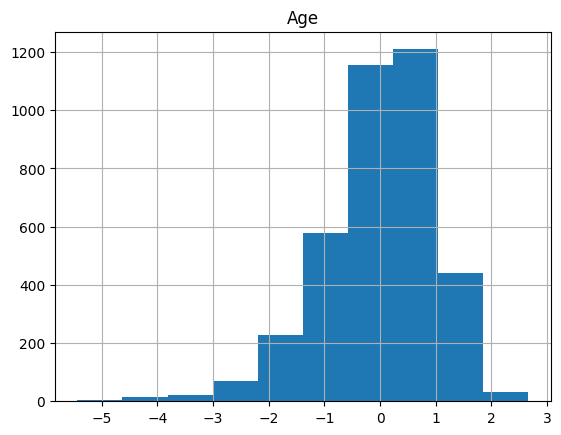

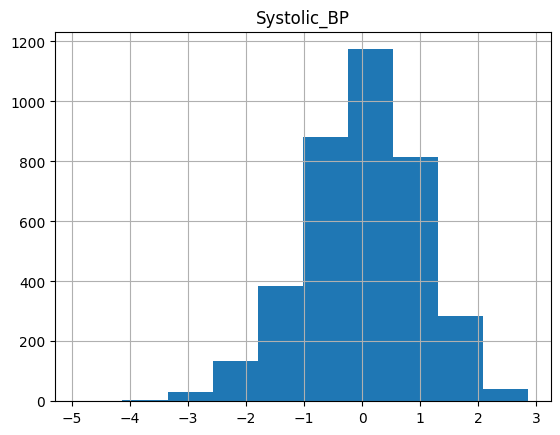

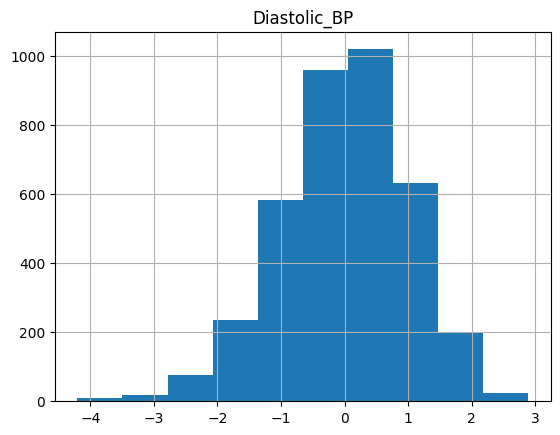

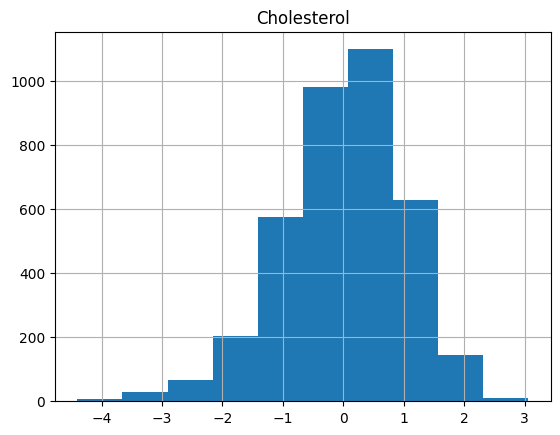

In [ ]:

for col in x_train.columns:
    x_train[col].hist()
    plt.title(col)
    plt.show()

To show how adding an interaction term affects the model's prediction.
Interaction terms can capture relationships like:

    "The effect of cholesterol on risk is different for older people than for younger people."

In [ ]:

print(f"Output with interaction: \t{model_X_int.predict_proba([case.values])[:, 1][0]:.4f}")
print(f"Output without interaction: \t{model_X_int.predict_proba([new_case.values])[:, 1][0]:.4f}")


Output with interaction: 	0.0425
Output without interaction: 	0.0404


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
def lr_model(x_train, y_train):
    from sklearn.linear_model import LogisticRegression
    model = LogisticRegression()
    model.fit(x_train, y_train)
    return model

In [ ]:
def manual_lr_model_test(model, X_train, y_train):
    # Select two specific samples from the training set
    sample_1 = X_train[3:4]  # 3rd index
    sample_2 = X_train[4:5]  # 4th index

    # Display their input values
    print(f"X_train[3:4] value: {sample_1.values.flatten()}")
    print(f"X_train[4:5] value: {sample_2.values.flatten()}")

    # Get the predicted class (0 or 1)
    pred_1 = model.predict(sample_1)[0]
    pred_2 = model.predict(sample_2)[0]

    print(f"Prediction for X_train[3:4]: {pred_1}")
    print(f"Prediction for X_train[4:5]: {pred_2}")

    # Show the true labels for comparison
    print(f"True label for X_train[3]: {y_train.iloc[3]}")
    print(f"True label for X_train[4]: {y_train.iloc[4]}")

    print("\n✅ All manual tests ran successfully!")



In [ ]:
# Run this:
trained_model = lr_model(x_train, y_train)
manual_lr_model_test(trained_model, x_train, y_train)

X_train[3:4] value: [ 0.06749068  1.38463519 -0.05362634  1.167925  ]
X_train[4:5] value: [ 1.52677852 -0.91795697  0.49021781 -0.04499504]
Prediction for X_train[3:4]: 1
Prediction for X_train[4:5]: 0
True label for X_train[3]: 1
True label for X_train[4]: 0

✅ All manual tests ran successfully!


In [ ]:
model_X = lr_model(x_train, y_train)

 Evaluate the Model Using the C-index

  The c-index measures the discriminatory power of a risk score.

 Intuitively, a higher c-index indicates that the model's prediction is in agreement with the actual outcomes of a pair of patients.

 A permissible pair is a pair of patients who have different outcomes.

 A concordant pair is a permissible pair in which the patient with the higher risk score also has the worse outcome.

 A tie is a permissible pair where the patients have the same risk score


In [ ]:
def cindex(y_true, scores):
    '''
    Input:
    y_true (np.array): a 1-D array of true binary outcomes (values of zero or one)
    scores (np.array): a 1-D array of corresponding risk scores output by the model

    Output:
    c_index (float): (concordant pairs + 0.5*ties) / number of permissible pairs
    '''
    n = len(y_true)
    assert len(scores) == n

    concordant = 0
    permissible = 0
    ties = 0

    for i in range(n):
        for j in range(i + 1, n):  # j > i

            # Check if the pair is permissible (different outcomes)
            if y_true[i] != y_true[j]:
                permissible += 1

                # Check for ties in score
                if scores[i] == scores[j]:
                    ties += 1
                    continue  # already counted, skip concordance check

                # Case 1: i = 0 (no disease), j = 1 (disease)
                if y_true[i] == 0 and y_true[j] == 1:
                    if scores[i] < scores[j]:
                        concordant += 1

                # Case 2: i = 1 (disease), j = 0 (no disease)
                elif y_true[i] == 1 and y_true[j] == 0:
                    if scores[i] > scores[j]:
                        concordant += 1

    c_index = (concordant + 0.5 * ties) / permissible if permissible > 0 else 0.0
    return c_index


In [ ]:
import numpy as np

# Test Case 1: All discordant (c-index = 0.0)
y_true1 = np.array([1, 0])
scores1 = np.array([0.3, 0.7])
print("Test Case 1: c-index =", cindex(y_true1, scores1))  # Expected: 0.0

# Test Case 2: All concordant (c-index = 1.0)
y_true2 = np.array([1, 0])
scores2 = np.array([0.7, 0.3])
print("Test Case 2: c-index =", cindex(y_true2, scores2))  # Expected: 1.0

# Test Case 3: Mixed (c-index = 0.75)
y_true = np.array([1, 1, 0, 0])
scores  = np.array([0.8, 0.4, 0.6, 0.2])
print("Test Case 3: c-index =", cindex(y_true, scores))  # Expected: 0.75

Test Case 1: c-index = 0.0
Test Case 2: c-index = 1.0
Test Case 3: c-index = 0.75


In [ ]:
#Evaluate the Model on the Test Set
scores = model_X.predict_proba(x_test)[:, 1]
c_index_X_test = cindex(y_test.values, scores)
print(f"c-index on test set is {c_index_X_test:.4f}")


c-index on test set is 0.9230


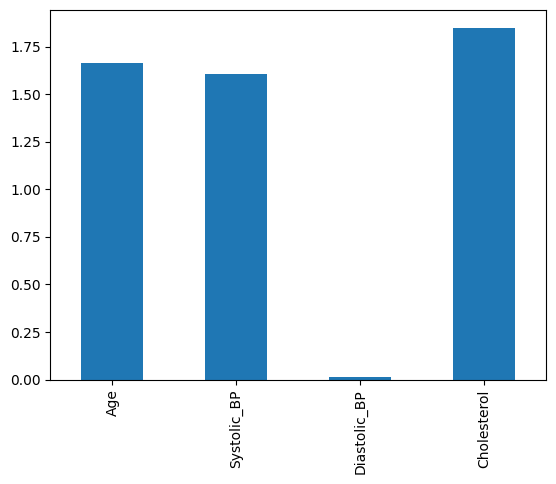

In [ ]:
coeffs = pd.DataFrame(data = model_X.coef_, columns = x_train.columns)
coeffs.T.plot.bar(legend=None);

In [ ]:
# ## 8. Improve the Model
 # An interaction term is the product of two variables.

In [ ]:
# UNQ_C4 (UNIQUE CELL IDENTIFIER, DO NOT EDIT)
def add_interactions(X):
    """
    Add interaction terms between columns to dataframe.

    Args:
    X (dataframe): Original data

    Returns:
    X_int (dataframe): Original data with interaction terms appended.
    """
    features = X.columns
    m = len(features)
    X_int = X.copy(deep=True)

    ### START CODE HERE (REPLACE INSTANCES OF 'None' with your code) ###
    # 'i' loops through all features in the original dataframe X
    for i in range(m):

        # get the name of feature 'i'
        feature_i_name = features[i]

        # get the data for feature 'i'
        feature_i_data = X[feature_i_name]

        # choose the index of column 'j' to be greater than column i
        for j in range(i + 1, m):

            # get the name of feature 'j'
            feature_j_name = features[j]

            # get the data for feature j'
            feature_j_data = X[feature_j_name]

            # create the name of the interaction feature by combining both names
            # example: "apple" and "orange" are combined to be "apple_x_orange"
            feature_i_j_name = f"{feature_i_name}_x_{feature_j_name}"

            # Multiply the data for feature 'i' and feature 'j'
            # store the result as a column in dataframe X_int
            X_int[feature_i_j_name] = feature_i_data * feature_j_data

    ### END CODE HERE ###

    return X_int

In [ ]:
X_train_int = add_interactions(x_train)
X_test_int = add_interactions(x_test)

In [ ]:
model_X_int = lr_model(X_train_int, y_train)

In [ ]:
scores_X = model_X.predict_proba(x_test)[:, 1]
c_index_X_int_test = cindex(y_test.values, scores_X)

scores_X_int = model_X_int.predict_proba(X_test_int)[:, 1]
c_index_X_int_test = cindex(y_test.values, scores_X_int)

print(f"c-index on test set without interactions is {c_index_X_test:.4f}")
print(f"c-index on test set with interactions is {c_index_X_int_test:.4f}")

c-index on test set without interactions is 0.9230
c-index on test set with interactions is 0.9504


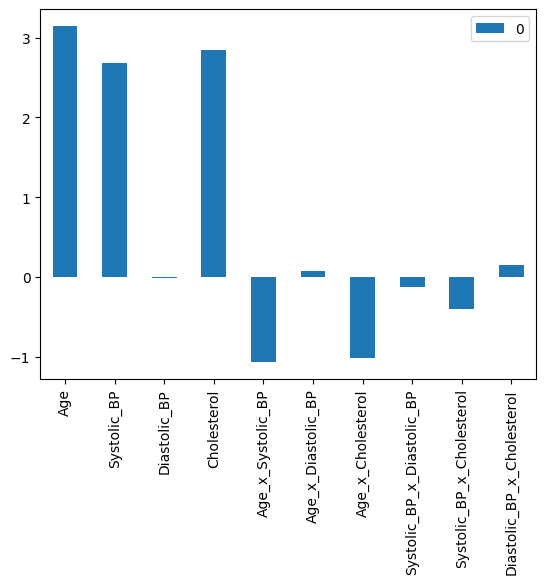

In [ ]:
# Now let's take another look at the model coefficients to try and see which variables made a difference. Plot the coefficients and report which features seem to be the most important.

# In[ ]:


int_coeffs = pd.DataFrame(data = model_X_int.coef_, columns = X_train_int.columns)
int_coeffs.T.plot.bar();

In [ ]:
index = 0
case = X_train_int.iloc[index, :]
print(case)

Age                           0.896981
Systolic_BP                  -0.236467
Diastolic_BP                  0.602161
Cholesterol                  -0.057706
Age_x_Systolic_BP            -0.212106
Age_x_Diastolic_BP            0.540127
Age_x_Cholesterol            -0.051761
Systolic_BP_x_Diastolic_BP   -0.142391
Systolic_BP_x_Cholesterol     0.013646
Diastolic_BP_x_Cholesterol   -0.034748
Name: 4154, dtype: float64


In [ ]:
new_case = case.copy(deep=True)
new_case.loc["Age_x_Cholesterol"] = 0
new_case

,4154
Age,0.896981
Systolic_BP,-0.236467
Diastolic_BP,0.602161
Cholesterol,-0.057706
Age_x_Systolic_BP,-0.212106
Age_x_Diastolic_BP,0.540127
Age_x_Cholesterol,0.000000
Systolic_BP_x_Diastolic_BP,-0.142391
Systolic_BP_x_Cholesterol,0.013646
Diastolic_BP_x_Cholesterol,-0.034748


### Model Evaluation Metrics

Here is the code to calculate and display various evaluation metrics for both the model without interaction terms and the model with interaction terms.

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

def evaluate_model(model, x_test, y_test):
    y_pred = model.predict(x_test)
    y_proba = model.predict_proba(x_test)[:, 1]  # For ROC-AUC

    # Metrics
    print("🔍 Model Evaluation Metrics:")
    print(f"✅ Accuracy:  {accuracy_score(y_test, y_pred):.4f}")
    print(f"✅ Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"✅ Recall:    {recall_score(y_test, y_pred):.4f}")
    print(f"✅ F1 Score:  {f1_score(y_test, y_pred):.4f}")
    print(f"✅ ROC-AUC:   {roc_auc_score(y_test, y_proba):.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(cmap='Blues')
    plt.title("Confusion Matrix")
    plt.show()


🔍 Model Evaluation Metrics:
✅ Accuracy:  0.9160
✅ Precision: 0.7193
✅ Recall:    0.5290
✅ F1 Score:  0.6097
✅ ROC-AUC:   0.9230


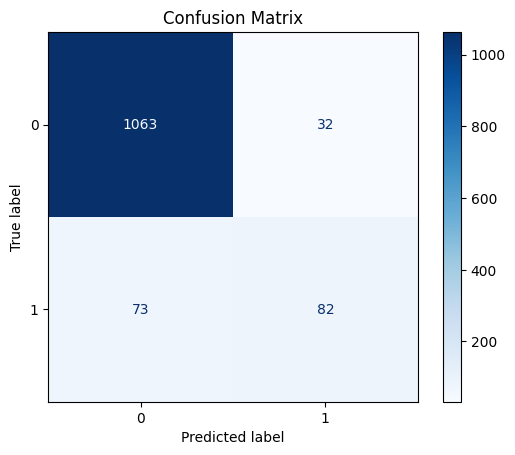

In [ ]:
# Evaluate the model without interaction terms
evaluate_model(model_X, x_test, y_test)


True Negatives (TN = 1063): Correctly predicted class 0.

False Positives (FP = 32): Mistakenly predicted class 1.

False Negatives (FN = 73): Missed real class 1 cases.

True Positives (TP = 82): Correctly predicted class 1.

 Linear Risk Model for Retinopathy in Diabetes Patients

### 1. Project Summary

*   **Goal:** To develop a model that can predict the risk of retinopathy (an eye condition causing vision loss) in patients with diabetes.
*   **Importance:** Diabetic retinopathy is a major cause of blindness, and early identification of high-risk patients is crucial for timely intervention and preventing vision loss.
*   **Approach:** We used a **Logistic Regression** model, a common and interpretable statistical method for binary classification, to build a risk score based on patient characteristics.
*   **Dataset:** The project utilized a synthetic dataset containing relevant patient features like Age, Blood Pressure (Systolic and Diastolic), and Cholesterol levels, along with the outcome variable (presence or absence of Retinopathy).